In [1]:
#Importing libraries

import pandas as pd
import numpy as np

In [2]:
## Getting data

train= pd.read_csv("heart.csv")
#test= pd.read_csv("o2Saturation.csv")

In [3]:
## loading Pycaret with data

import pycaret

In [4]:
#Getting data shapes
train.shape

(303, 14)

In [5]:
#Getting data shapes
test.shape

(3585, 1)

In [6]:
train.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# Handling missing values with the mode and then the numberical with the median. 

def fill_with_mode(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include='object').columns:
    fill_with_mode(train,i)
for j in test.select_dtypes(include='object').columns:
    fill_with_mode(test,j)

In [9]:
def fill_with_median(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(train,i)
for j in test.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(test,j)

In [10]:
train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
# Using panda's profilling for EDA 
# Loading library
from pandas_profiling import ProfileReport

In [13]:
#Generating report 
profile = ProfileReport(train, title="Pandas Profiling Report")

In [14]:
# To view the report
profile.to_widgets()

In [27]:
#Finding duplicate 
train[train.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [28]:
train = train.drop_duplicates()

**Discussion:**

At this point, the data has been preprocessed for handling missing values and filling in the blanks. Panda profile shows not strong correlation with any of the metrics to be concerned with multicollinarity. 

Please note you can also remove multicollinarity with Pycaret with the thrashold set. 

In [15]:
from pycaret.classification import *
clf1 = setup(data = train, target = 'output')

,Description,Value
0,session_id,3688
1,Target,output
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8775,0.9207,0.9091,0.8653,0.8856,0.7539,0.7568,0.0080
ridge,Ridge Classifier,0.8729,0.0000,0.9000,0.8645,0.8809,0.7448,0.7474,0.0090
rf,Random Forest Classifier,0.8729,0.9187,0.8818,0.8801,0.8765,0.7455,0.7537,0.1900
lr,Logistic Regression,0.8682,0.9272,0.9000,0.8534,0.8750,0.7356,0.7393,0.2240
et,Extra Trees Classifier,0.8400,0.9051,0.8545,0.8518,0.8461,0.6786,0.6893,0.1830
catboost,CatBoost Classifier,0.8353,0.9123,0.8455,0.8448,0.8413,0.6696,0.6765,3.4430
gbc,Gradient Boosting Classifier,0.8255,0.8970,0.8273,0.8456,0.8304,0.6503,0.6592,0.0240
nb,Naive Bayes,0.8069,0.8893,0.8818,0.7836,0.8261,0.6110,0.6237,0.0080
xgboost,Extreme Gradient Boosting,0.8015,0.8835,0.8455,0.8046,0.8203,0.5996,0.6068,0.1150
ada,Ada Boost Classifier,0.7872,0.8601,0.8000,0.8017,0.7979,0.5727,0.5770,0.0270


In [17]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7727,0.8512,0.8182,0.7500,0.7826,0.5455,0.5477
1,0.9545,0.9917,1.0000,0.9167,0.9565,0.9091,0.9129
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8571,0.8727,0.9091,0.8333,0.8696,0.7123,0.7156
4,0.9524,0.9636,1.0000,0.9167,0.9565,0.9041,0.9083
5,0.7143,0.7000,0.8182,0.6923,0.7500,0.4220,0.4301
6,0.9524,0.9818,1.0000,0.9167,0.9565,0.9041,0.9083
7,0.8571,0.9636,0.8182,0.9000,0.8571,0.7149,0.7182
8,0.8095,0.9000,0.8182,0.8182,0.8182,0.6182,0.6182
9,0.9048,0.9818,0.9091,0.9091,0.9091,0.8091,0.8091


In [18]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7727,0.8182,0.8182,0.7500,0.7826,0.5455,0.5477
1,0.9091,0.9504,0.9091,0.9091,0.9091,0.8182,0.8182
2,0.9048,0.9909,0.9091,0.9091,0.9091,0.8091,0.8091
3,0.8095,0.9273,0.8182,0.8182,0.8182,0.6182,0.6182
4,0.9048,0.9636,1.0000,0.8462,0.9167,0.8073,0.8228
5,0.7619,0.7545,0.7273,0.8000,0.7619,0.5249,0.5273
6,0.9048,0.9818,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.8571,0.9545,0.8182,0.9000,0.8571,0.7149,0.7182
8,0.8095,0.9182,0.8182,0.8182,0.8182,0.6182,0.6182
9,0.9524,1.0000,1.0000,0.9167,0.9565,0.9041,0.9083


In [19]:
pred_holdout = predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8022,0.8626,0.8909,0.8033,0.8448,0.5741,0.5800


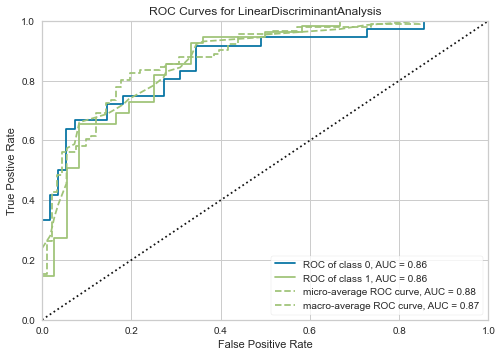

In [21]:
plot_model(lda)

In [22]:
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [23]:
#Finalizing predictions based off the training data. 
lda_final = finalize_model(lda)

In [25]:
#Predictions of unseen data. 
predictions = predict_model(lda_final, data = train)

In [26]:
predictions

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label,Score
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,0.9293
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0.9361
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0.9917
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0.9893
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0.9551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0.7192
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,0.7276
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0.9944
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0.9938
